In [ ]:
pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.2 MB/s eta 0:00:00


In [ ]:
pip install mne[hdf5]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import mne

In [ ]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 785GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [ ]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


"Raw" objects also have several built-in plotting methods; here we show the power spectral density(PSD) for each sensor type with "plot_psd", as well as a plot of the raw sensor traces with "plot". In the PSD plot, we'll only plot frequencies below 50 Hz (since our data are low-pass filtered at 40 Hz). In interective Python sessions, "plot" is interactive and allows scrolling, scaling, bad channel marking, annotations, projector toggling, etc.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
Using matplotlib as 2D backend.


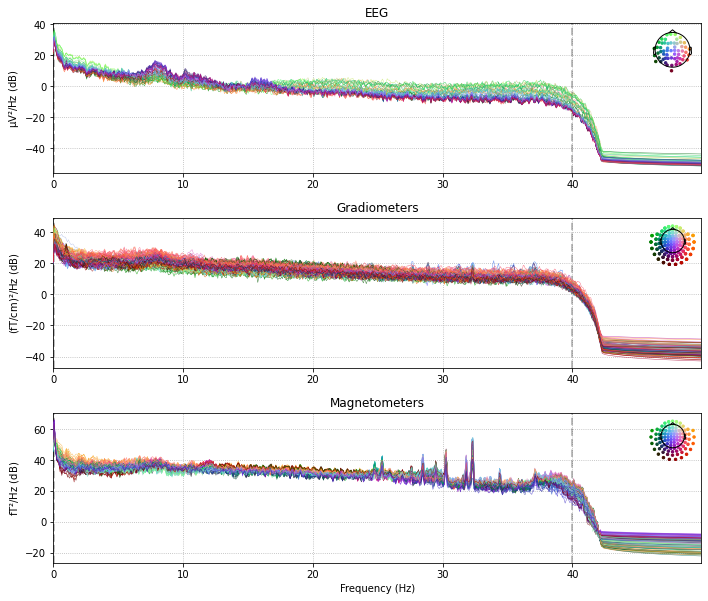

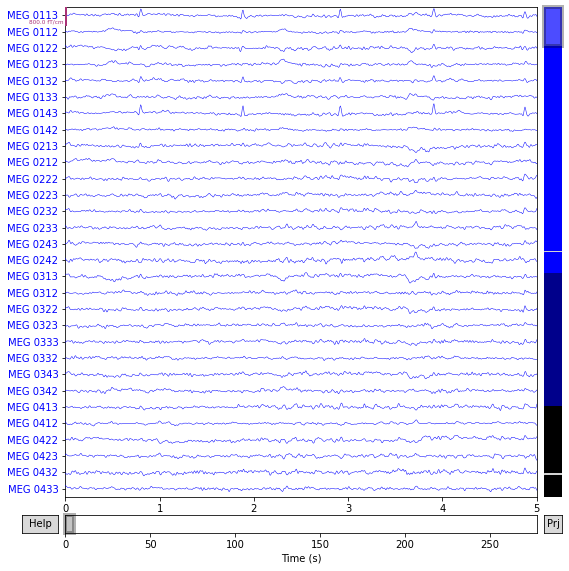

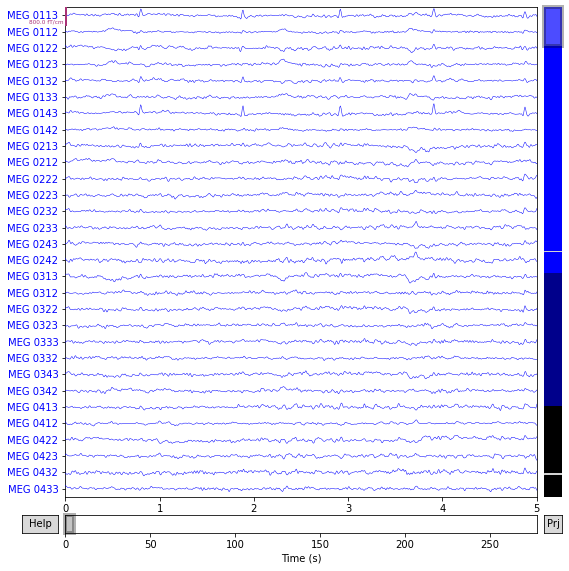

In [ ]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

**Preprocessing**

MNE-Python supports a variety of preprocessing approaches and techniques (maxwell filtering, signal-space projection, independent component analysis, filtering, downsampling, etc.); see the full list of capabilities in the "https://mne.tools/stable/preprocessing.html#module-mne.filter" submodules. Here we'll clean up our data by performing independent component analysis(ICA); for brevity we'll skip the steps that helped us determined which component best capture the artifacts.


Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 11.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


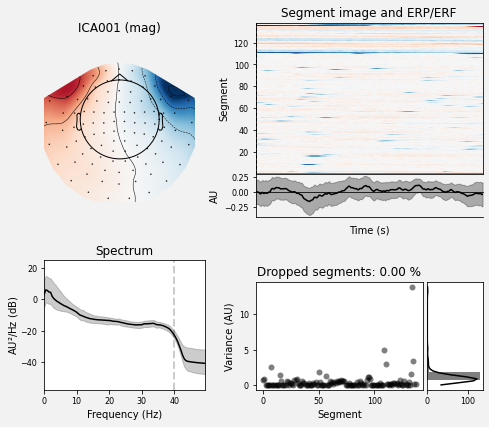

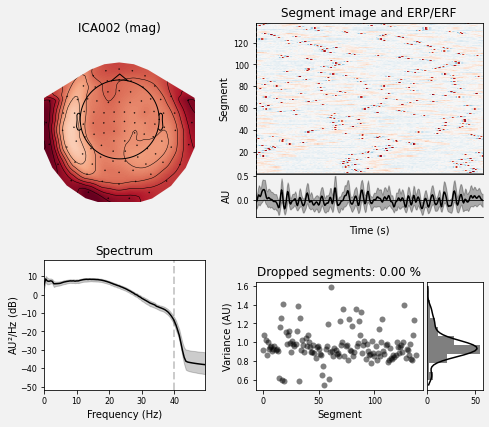

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:
#set up and fit the ICA
ica = mne.preprocessing.ICA(n_components = 20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2] # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 50 components
Fitting ICA took 18.2s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


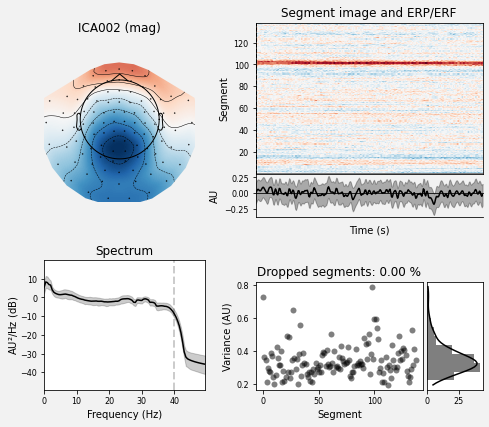

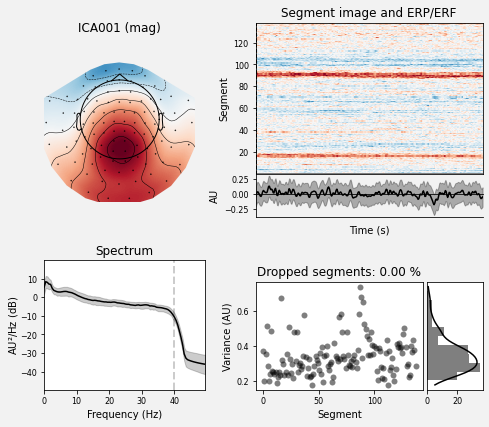

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:
#set up and fit the ICA
ica = mne.preprocessing.ICA(n_components = 50, random_state=50, max_iter=800)
ica.fit(raw)
ica.exclude = [2, 1] # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Once we're confident about which component(s) we want to remove, we pass them as the "exclude" parameter and then apply the ICA to the raw signal. The "apply" method requires the raw data to be loaded into memory(by default it's only read from disk as needed), so we'll use "load_data" first. We'll also make a copy of the "Raw" object so we can compare the signal before and after artifact removal side-by-side:

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (50 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


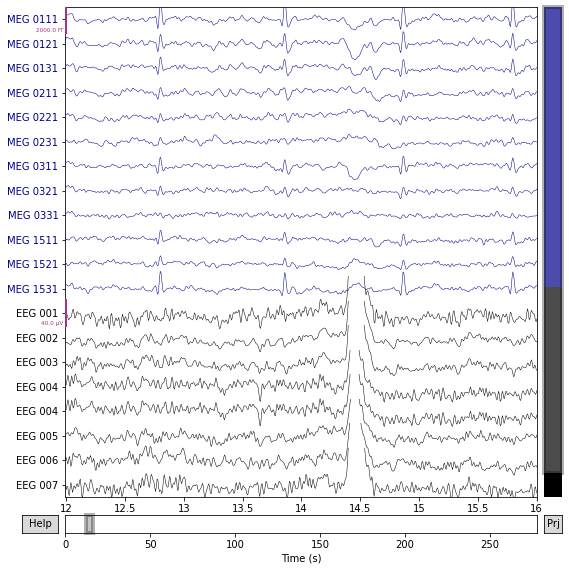

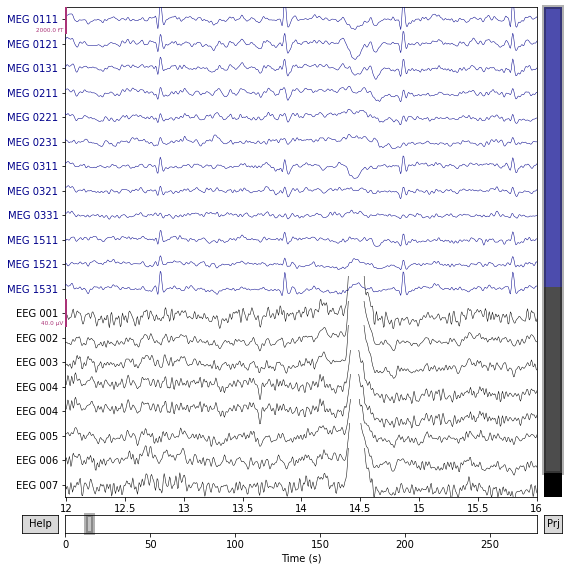

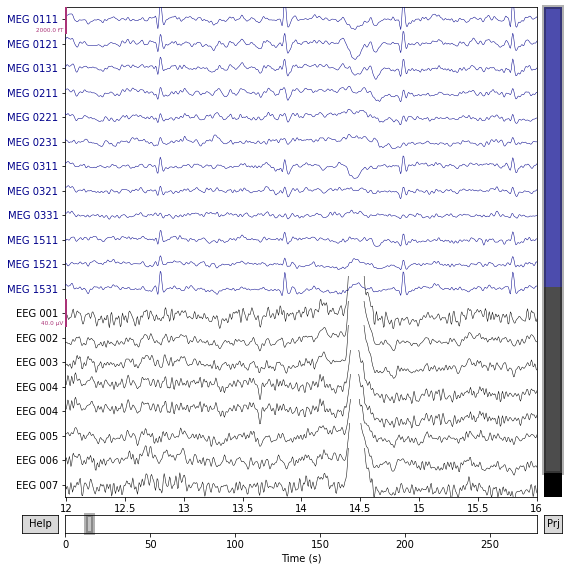

In [ ]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

#show some frontal channels to clearly illustrate the artifact removal 

chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531', 
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start = 12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

Applying ICA to Raw instance
    Transforming to ICA space (50 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


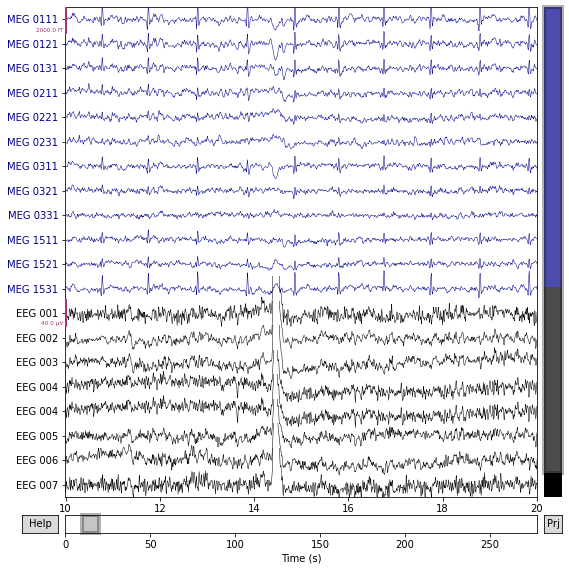

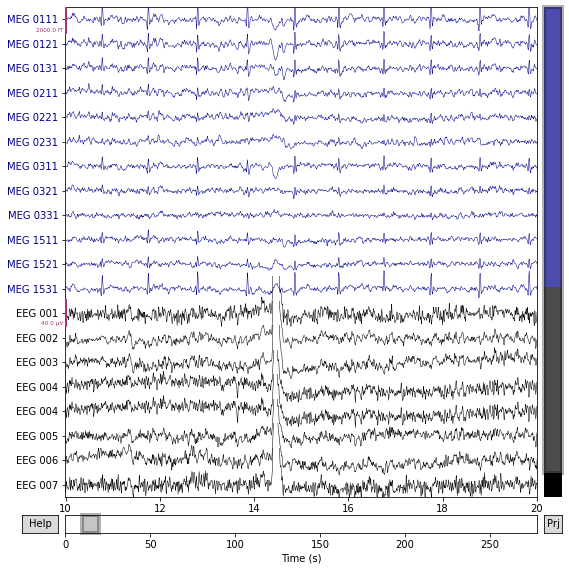

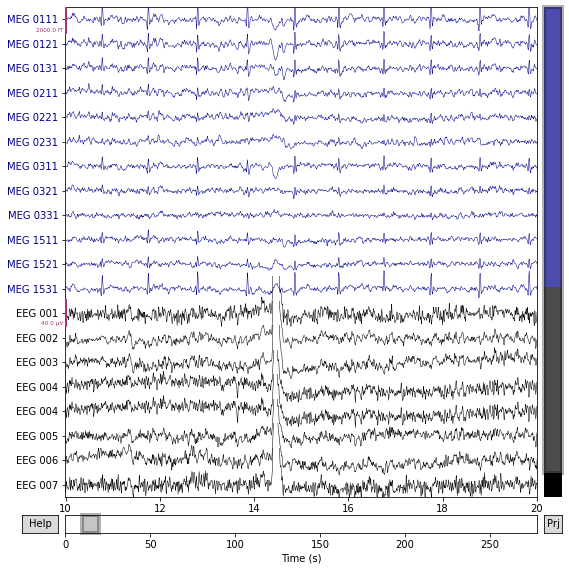

In [ ]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

#show some frontal channels to clearly illustrate the artifact removal 

chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531', 
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start = 10, duration=10)
raw.plot(order=chan_idxs, start=10, duration=10)

**Detecting experimental events**

The sample dataset includes several "STIM Channels" that recorded electrical signals sent from the stimulus delivery computer (as brief DC shifts / squarewave pulses). These pulses(often called "triggers") are used in this dataset to mark experimental events: stimulus onset, stimulus type, and participant response (button press). The individual STIM channels are combined onto a single channel, in such a way that voltage levels on that channel can be unambiguously decoded as a particular event type. On older Neuromag systems(such as that used to record the sample data) this summation channel was called STI 014, so we can pass that channel name to the "mne.find_events" function to recover the timing and identity of the stimulus events. 

In [ ]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5]) #show the first 5

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [ ]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:10])

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]
 [7506    0    3]
 [7612    0    1]
 [7709    0    4]
 [7810    0    2]
 [7916    0    3]]


The resulting events in an ordinary 3-column "NumPy array", with sample number in the first column and integer event ID in the last column; the middle column is usually ignored. Rather than keeping track of integer event IDs, we can provide an event dictionary that maps the integer IDs to experimental conditions or events. In this dataset, the mapping looks like this:



Event ID     Condition

1            auditory stimulus (tone) to the left ear
2            auditory stimulus (tone) to the right ear
3            visual stimulus (checkerboard) to the left visual field
4            visual stimulus (checkerboard) to the right visual field
5             smiley face (catch trial)
32            subject button press

In [ ]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right' :4, 'smiley': 5, 'buttonpress': 32}

Event dictionaries like this one are used when extracting epochs from continuous data; the "/" character in the dictionary keys allows pooling across conditions by requesting partial condition descriptors(requesting 'auditory' will select all epochs with Event IDs 1 and 2; requesting 'left' will select all epochs with Event IDs 1 and 3). An example of this is shown in the next section. There is also a convenient "plot_events" functions for visualizing the distribution of events across the duration of the recording (to make sure event detection worked as expected). Here we'll also make use of the "Info" attribute to get the sampling frequency of the recording(so our x-axis will be in seconds instead of in samples).

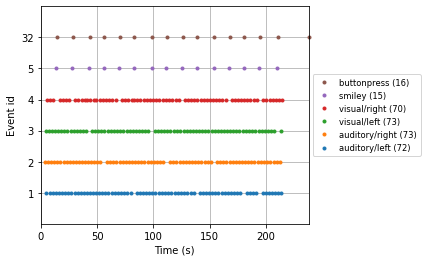

In [ ]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

For paradigms that are not event-releated(e.g., analysis of resting of resting-state data), you can extract regularly spaced(possibly overlapping) spans of data by creating events using "mne.make_fixed_length_events" and then. proceeding with epoching as described in the next section. 

**Epoching Continuous Data**

The "Raw" object and the events array are the bare minumum needed to create an "Epochs" object, which we create with the "Epochs" class constructor. Here we'll also specify some data quality constraints: we'll reject any epoch where peak-to-peak signal amplitude is beyond reasonable limits for that channel type. This is done with a rejection dictionary; you may include or omit thresholds for any of the channel types present in your data. The values given here are reasonable for this particular dataset, but may need to be adapted for different hardware or recording conditions. For a more automated approach, consider usingn the [autoreject](https://autoreject.github.io/stable/index.html)

In [ ]:
reject_criteria = dict(mag=4000e-15,        # 4000 fT
                       grad=4000e-13,       # 4000 dT/cm
                       eeg=150e-6,          #15 µV
                       eog=250e-6)           #250 µV

We'll also pass the event dictionary as the "event_id" parameter( so we can work with easy-to-pool event labels instead of the integer event IDs,) and specify "tmin" and "tmax"( the time releative to each event at which to start and end each epoch). As mentioned above, by default "Raw" and "Epochs" data aren't loaded into memory (they're accessed from disk only when needed), but here we'll force loading into memory using the "preload=True" parameter so that we can see the results of the rejection criteria being applied:

In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Using data from preloaded Raw for 319 events and 106 original time points ...
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
10 bad epochs dropped


Next we'll pool across left/right stimulus presentations so we can compare auditory versus visual responses. To aviod biasing our signals to the left or right, we'll use "equalize_event_counts" first to randomly sample epochs from each condition to match the number of epochs present in the condition with the fewest good epochs.

In [ ]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']
del raw, epochs  # free up memory

Dropped 7 epochs: 121, 195, 258, 271, 273, 274, 275


Like "Raw" objects, "Epochs" objects also have a number of built-in plotting methods. One is "plot_image", which shows each epoch as one row of an image map, with color representing signal magnitude; the average evoked response and the sensor location are shown below the image:

Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated


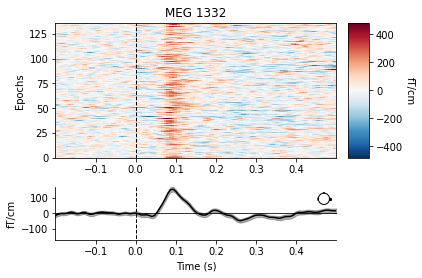

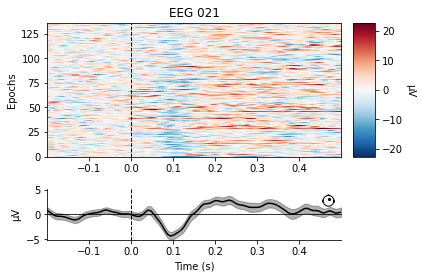

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [ ]:
aud_epochs.plot_image(picks=['MEG 1332', 'EEG 021'])

**!NOTE!**

Both "Raw" and "Epochs" objects have "get_data" methods that return the underlying data as a "NumPy array". Both methods have "picks" parameter for subselecting which channel(s) to return; "raw.get_data()" has additional parameters for restricting the time domain. The resulting matrices have dimension (n_channels, n_times) for "Raw" and (n_epochs, n_channels, n_times) for Epochs.

**Time-frequency analysis**

the mne.time_frequency submodule provides implementations of several algorithms to compute time-frequency representations, power spectral density, and cross-spectral density. Here, for example, we'll compute for the auditory epochs the induced power at different frequencies and times, using Morlet wavelets. On this dataset the result is not especially informative(it just shows the evoked "auditory N100" response).

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
No baseline correction applied


[Parallel(n_jobs=1)]: Done 364 out of 364 | elapsed:   11.1s finished


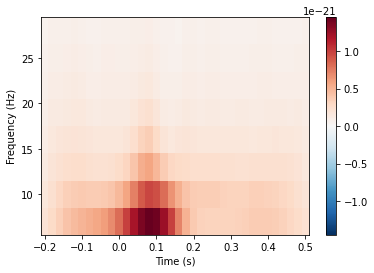

[<Figure size 432x288 with 2 Axes>]

In [ ]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(aud_epochs, n_cycles=3, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['MEG 1332'])

**Estimating evoked responses**

Now that we have our conditions in "aud_epochs" and "vis_epochs", we can get an estimate of evoked responses to auditory versus stimuli by averaging together the epochs in each condition. This is as simple as calling the "average" method on the "Epochs" object, and then using a function from the "mne.viz" module to compare the global field power for each sensor type of the two "Evoked" objects

Multiple channel types selected, returning one figure per type.
combining channels using "gfp"
combining channels using "gfp"


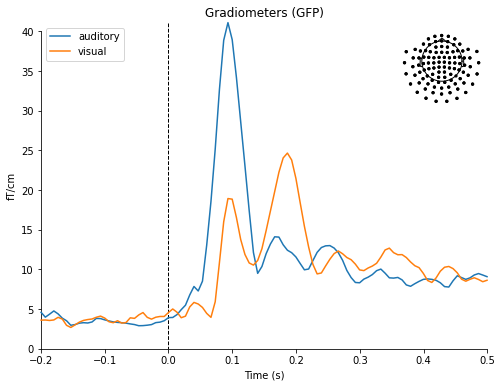

combining channels using "gfp"
combining channels using "gfp"


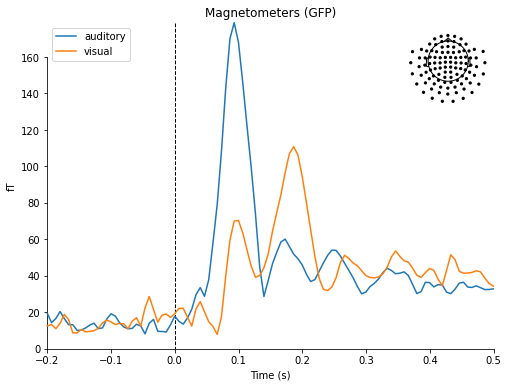

combining channels using "gfp"
combining channels using "gfp"


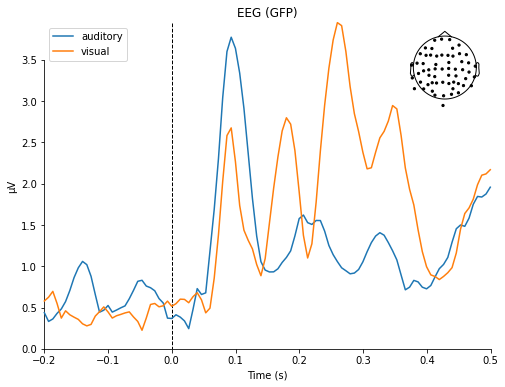

[<Figure size 576x432 with 2 Axes>,
 <Figure size 576x432 with 2 Axes>,
 <Figure size 576x432 with 2 Axes>]

In [ ]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                             legend='upper left', show_sensors='upper right')

we can also get a more detailed view of each "Evoked" object using other plotting methods such as "plot_joints" or "plot_topomap". Here we'll examine just the EEG channels, and see the classic auditory evoked N100-P200 pattern over dorso-frontal electrodes, then plot scalp topographies at some additional arbitary times:

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


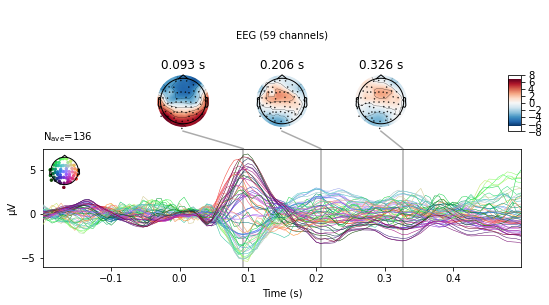

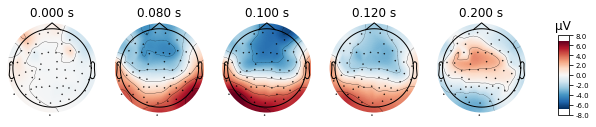

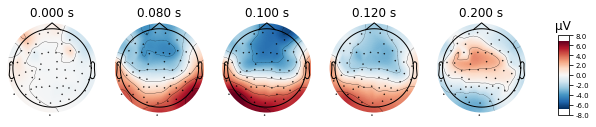

In [ ]:
aud_evoked.plot_joint(picks='eeg')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

Evoked objects can also be combined to show contrasts between conditions, using the "mne.combine_evoked" function. A simple difference can be generated by passing "weights=[1, -1]". We'll then plot the difference wave at each sensor using "plot_topo"

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


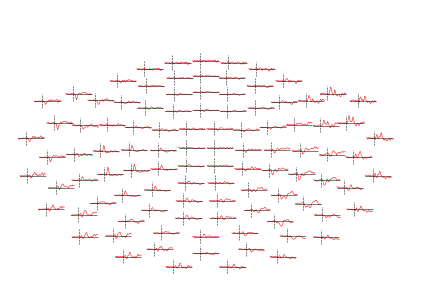

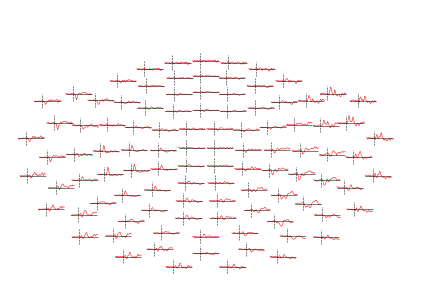

In [ ]:
evoked_diff = mne.combine_evoked([aud_evoked, vis_evoked], weights=[1, -1])
evoked_diff.pick_types(meg='mag').plot_topo(color='r', legend=False)

**Inverse Modelling**

Finally, we can estimate the origins of the evoked activity by projecting the sensor data into this subject’s source space (a set of points either on the cortical surface or within the cortical volume of that subject, as estimated by structural MRI scans). MNE-Python supports lots of ways of doing this (dynamic statistical parametric mapping, dipole fitting, beamformers, etc.); here we’ll use minimum-norm estimation (MNE) to generate a continuous map of activation constrained to the cortical surface. MNE uses a linear inverse operator to project EEG+MEG sensor measurements into the source space. The inverse operator is computed from the forward solution for this subject and an estimate of the covariance of sensor measurements. For this tutorial we’ll skip those computational steps and load a pre-computed inverse operator from disk (it’s included with the sample data). Because this “inverse problem” is underdetermined (there is no unique solution), here we further constrain the solution by providing a regularization parameter specifying the relative smoothness of the current estimates in terms of a signal-to-noise ratio (where “noise” here is akin to baseline activity level across all of cortex).

In [ ]:
#Load inverse operator

inverse_operator_file = (sample_data_folder / 'MEG' / 'sample' / 'sample_audvis-meg-oct-6-meg-inv.fif')
inv_operator = mne.minimum_norm.read_inverse_operator(inverse_operator_file)

#set signal-to-noise ratio( SNR) to compute regularization parameter

snr = 3.
lambda2 = 1. / snr ** 2
#generate the source time course (STC)

stc = mne.minimum_norm.apply_inverse(vis_evoked, inv_operator,
                                     lambda2=lambda2,
                                     method='MNE')

Reading inverse operator decomposition from /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch sta

finally, in order to plot the source estimate on the subject's structural MRI files